In [1]:
import random
import numpy as np
import scipy
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import f
from statsmodels.stats.weightstats import *
import math
import docx

In [2]:
class distr:
    def __init__(self, random_state, name, n, *args):
        self.name = name
        self.args = args
        self.n = n
        
        if name == 'norm':
            self.data = stats.norm.rvs(args[0], args[1], size = n, random_state = random_state)
            self.r_mean = args[0]
            self.r_var = args[1]**2
            self.r_std = args[1]
            
        if name == 'chi2':
            self.data = stats.chi2.rvs(args[0], size = n, random_state = random_state)
            self.r_mean = args[0]
            self.r_var = args[0]*2
            self.r_std = np.sqrt(args[0]*2)
            
        if name == 'r':
            self.data = stats.uniform(loc = args[0], scale = args[1] - args[0]).rvs(size = n, random_state = random_state)
            self.r_mean = (args[0] + args[1])/2.
            self.r_var = (args[1] - args[0])**2/12.
            self.r_std = np.sqrt((args[1] - args[0])**2/12.)
            
        self.s_mean = self.data.mean()
        self.s_var = self.data.var(ddof = 1)
        self.s_std = self.data.std(ddof = 1)
        
        
    def __str__(self):
        return str(self.name) + ' ' + str(self.args) + ' ' + str(self.n) + \
                ' sample_mean=' + str(round(self.s_mean, 2)) + ' sample_var=' + str(round(self.s_var, 2))
    
    def z_test(self, m0):
        z = (self.s_mean - m0)/(self.r_std/np.sqrt(self.n))
        p_val = 2*(1 - stats.norm.cdf(abs(z)))
        return (z, p_val)
    
    def t_test(self, m0):
        z = (self.s_mean - m0)/(self.s_std/np.sqrt(self.n))
        p_val = 2*(1 - stats.t.cdf(abs(z), self.n - 1))
        return (z, p_val)
    
    def chi2_test0(self, v0):
        z = np.sum((self.data - self.r_mean)**2)/v0
        p_val = 2*min(1 - stats.chi2.cdf(z, self.n), stats.chi2.cdf(z, self.n))
        return (z, p_val)
    
    def chi2_test1(self, v0):
        z = self.s_var*(self.n - 1)/v0
        p_val = 2*min(1 - stats.chi2.cdf(z, self.n - 1), stats.chi2.cdf(z, self.n - 1))
        return (z, p_val)

In [3]:
def pooled_mean(*args):
    res = sum([len(args[i])*np.mean(args[i]) for i in range(len(args))])/sum([len(args[i]) for i in range(len(args))])
    return res

In [4]:
def pooled_var(*args):
    res = sum([(len(args[i])-1)*np.var(args[i]) for i in range(len(args))])/sum([(len(args[i])-1) for i in range(len(args))])
    return res

In [5]:
def task_1(dist_1:distr, dist_2:distr, doc):
    
    doc.tables[0].rows[1].cells[1].text  = dist_1.name
    doc.tables[0].rows[2].cells[1].text  = dist_2.name
    doc.tables[0].rows[1].cells[5].text  = str(dist_1.n)
    doc.tables[0].rows[2].cells[5].text  = str(dist_2.n)
    
    for dist in enumerate((dist_1,  dist_2)):
        if dist[1].name == 'norm':
            doc.tables[0].rows[dist[0] + 1].cells[2].text  = 'm='+str(dist[1].args[0])+'\nstd='+str(dist[1].args[1])
            doc.tables[0].rows[dist[0] + 1].cells[3].text  = str(dist[1].args[0])
            doc.tables[0].rows[dist[0] + 1].cells[4].text  = str(round(dist[1].args[1]**2))
        
        if dist[1].name == 'chi2':
            doc.tables[0].rows[dist[0] + 1].cells[2].text  = 'число ст. своб='+str(dist[1].args[0])
            doc.tables[0].rows[dist[0] + 1].cells[3].text  = str(dist[1].args[0])
            doc.tables[0].rows[dist[0] + 1].cells[4].text  = str(round(dist[1].args[0]*2))
        
        if dist[1].name == 'r':
            doc.tables[0].rows[dist[0] + 1].cells[2].text  = 'a='+str(dist[1].args[0])+'\nb='+str(dist[1].args[1])
            doc.tables[0].rows[dist[0] + 1].cells[3].text  = str(round((dist[1].args[0] + dist[1].args[1])/2., 2))
            doc.tables[0].rows[dist[0] + 1].cells[4].text  = str(round((dist[1].args[1] - dist[1].args[0])**2/12., 2))
         
   
    for dist in enumerate((dist_1, dist_2)):
        doc.tables[1].rows[dist[0] + 1].cells[1].text = str(round(dist[1].s_mean, 2))
        doc.tables[1].rows[dist[0] + 1].cells[2].text = str(round(dist[1].s_var, 2))
        doc.tables[1].rows[dist[0] + 1].cells[3].text = str(round(dist[1].s_var**(0.5), 2))
        
    doc.tables[1].rows[3].cells[1].text = str(round(pooled_mean(dist_1.data, dist_2.data), 2))
    doc.tables[1].rows[3].cells[2].text = str(round(pooled_var(dist_1.data, dist_2.data), 2))
    doc.tables[1].rows[3].cells[3].text = str(round(np.sqrt(pooled_var(dist_1.data, dist_2.data)), 2))
    
    

In [6]:
def task_2(dist_1:distr, dist_2:distr, alpha, doc):
    
    doc.tables[2].rows[1].cells[1].text  = 'm = ' + str(dist_1.r_mean)
    doc.tables[2].rows[2].cells[1].text  = 'm = ' + str(dist_1.r_mean)
    doc.tables[2].rows[3].cells[1].text  = 'var = ' + str(dist_1.r_var)
    doc.tables[2].rows[4].cells[1].text  = 'var = ' + str(dist_1.r_var)
    
    z1 = dist_1.z_test(dist_1.r_mean)
    z2 = dist_1.t_test(dist_1.r_mean)
    z3 = dist_1.chi2_test0(dist_1.r_var)
    z4 = dist_1.chi2_test1(dist_1.r_var)
    
    doc.tables[2].rows[1].cells[2].text = str(round(z1[0], 3))
    doc.tables[2].rows[2].cells[2].text = str(round(z2[0], 3))
    doc.tables[2].rows[3].cells[2].text = str(round(z3[0], 3))
    doc.tables[2].rows[4].cells[2].text = str(round(z4[0], 3))
    
    doc.tables[2].rows[1].cells[3].text = "{:.3e}".format(z1[1])
    doc.tables[2].rows[2].cells[3].text = "{:.3e}".format(z2[1])
    doc.tables[2].rows[3].cells[3].text = "{:.3e}".format(z3[1])
    doc.tables[2].rows[4].cells[3].text = "{:.3e}".format(z4[1])
    
    p_arr = [z1[1], z2[1], z3[1], z4[1]]
    
    for val in enumerate(p_arr):
        
        if val[1] < alpha:
            doc.tables[2].rows[val[0] + 1].cells[4].text = 'H0 отверг'
            doc.tables[2].rows[val[0] + 1].cells[5].text = 'Ош. 1го рода'
        else:
            doc.tables[2].rows[val[0] + 1].cells[4].text = 'H0 приним'
            doc.tables[2].rows[val[0] + 1].cells[5].text = 'Нет ош.'

In [7]:
def task_3(dist_1:distr, dist_2:distr, alpha, doc):
    
    doc.tables[3].rows[1].cells[1].text  = 'm1 = m2' 
    doc.tables[3].rows[2].cells[1].text  = 'var1 = var2' 
    doc.tables[3].rows[3].cells[1].text  = 'var1 = var2' 
    
    z2 = [0,0]
    z3 = [0,0]
    
    if (dist_1.r_var == dist_2.r_var):
        z1 = stats.ttest_ind(dist_1.data, dist_2.data)
    else:
        z1 = stats.ttest_ind(dist_1.data, dist_2.data, equal_var=False)
        
    z2[0] = np.sum((dist_1.data - dist_1.r_mean)**2)/np.sum((dist_2.data - dist_2.r_mean)**2)
    z3[0] = np.sum((dist_1.data - dist_1.s_mean)**2)/np.sum((dist_2.data - dist_2.s_mean)**2)
    z2[1] = 2*min(1 - f.cdf(z2[0], dfn = dist_1.n, dfd = dist_2.n), f.cdf(z2[0], dfn = dist_1.n, dfd = dist_2.n))
    z3[1] = 2*min(1 - f.cdf(z2[0], dfn = dist_1.n - 1, dfd = dist_2.n - 1), f.cdf(z2[0], dfn = dist_1.n - 1, dfd = dist_2.n - 1))
    
    doc.tables[3].rows[1].cells[2].text = str(round(z1[0], 3))
    doc.tables[3].rows[2].cells[2].text = str(round(z2[0], 3))
    doc.tables[3].rows[3].cells[2].text = str(round(z3[0], 3))
   
    doc.tables[3].rows[1].cells[3].text = "{:.3e}".format(z1[1])
    doc.tables[3].rows[2].cells[3].text = "{:.3e}".format(z2[1])
    doc.tables[3].rows[3].cells[3].text = "{:.3e}".format(z3[1])
   
    
    p_arr = [z1[1], z2[1], z3[1]]
    
    for val in enumerate(p_arr):
        
        if val[1] < alpha:
            
            doc.tables[3].rows[val[0] + 1].cells[4].text = 'H0 отверг'
            
            if val[0] == 0:
                
                if dist_1.r_mean == dist_2.r_mean:
                    doc.tables[3].rows[val[0] + 1].cells[5].text = 'Ош. 1го рода'
                else:
                    doc.tables[3].rows[val[0] + 1].cells[5].text = 'Нет ош.'
                    
            else:
                
                if dist_1.r_var == dist_2.r_var:
                    doc.tables[3].rows[val[0] + 1].cells[5].text = 'Ош. 1го рода'
                else:
                    doc.tables[3].rows[val[0] + 1].cells[5].text = 'Нет ош.'
                    
        else:
            
            doc.tables[3].rows[val[0] + 1].cells[4].text = 'H0 приним'
            
            if val[0] == 0:
                
                if dist_1.r_mean == dist_2.r_mean:
                    doc.tables[3].rows[val[0] + 1].cells[5].text = 'Нет ош.'
                else:
                    doc.tables[3].rows[val[0] + 1].cells[5].text = 'Ош. 2го рода'
                    
            else:
                
                if dist_1.r_var == dist_2.r_var:
                    doc.tables[3].rows[val[0] + 1].cells[5].text = 'Нет ош.'
                else:
                    doc.tables[3].rows[val[0] + 1].cells[5].text = 'Ош. 2го рода'

In [8]:
def task_4(dist_1:distr, dist_2:distr, doc, ind, random_state):
    fig, ax = plt.subplots(1, 1)
    if ind==1 or ind==5:
        r = stats.norm.rvs(size=1000,random_state = random_state)
        
        x = np.linspace(stats.norm.ppf(0.01),
               stats.norm.ppf(0.99), 100)
        ax.plot(x, stats.norm.pdf(x),
          'r-', lw=2, alpha=0.6)
        
    if ind==2:
        r = stats.t(dist_1.n - 1).rvs(size=1000,random_state = random_state)
        
        x = np.linspace(stats.t(dist_1.n - 1).ppf(0.01),
               stats.t(dist_1.n - 1).ppf(0.99), 100)
        ax.plot(x, stats.t(dist_1.n - 1).pdf(x),
          'r-', lw=2, alpha=0.6)
        
    if ind==6:
        r = stats.t(dist_1.n + dist_2.n - 2).rvs(size=1000,random_state = random_state)
        
        x = np.linspace(stats.t(dist_1.n + dist_2.n - 2).ppf(0.01),
               stats.t(dist_1.n + dist_2.n - 2).ppf(0.99), 100)
        ax.plot(x, stats.t(dist_1.n + dist_2.n - 2).pdf(x),
          'r-', lw=2, alpha=0.6)
        
    if ind==3:
        r = stats.chi2(dist_1.n).rvs(size=1000,random_state = random_state)
        
        x = np.linspace(stats.chi2(dist_1.n).ppf(0.01),
               stats.chi2(dist_1.n).ppf(0.99), 100)
        ax.plot(x, stats.chi2(dist_1.n).pdf(x),
          'r-', lw=2, alpha=0.6)
        
    if ind==4:
        r = stats.chi2(dist_1.n - 1).rvs(size=1000,random_state = random_state)
        
        x = np.linspace(stats.chi2(dist_1.n - 1).ppf(0.01),
               stats.chi2(dist_1.n - 1).ppf(0.99), 100)
        ax.plot(x, stats.chi2(dist_1.n - 1).pdf(x),
          'r-', lw=2, alpha=0.6)
        
    if ind==7:
        r = stats.f.rvs(size=1000,random_state = random_state, dfn = dist_1.n, dfd = dist_2.n)
        
        x = np.linspace(f.ppf(0.01, dfn = dist_1.n, dfd = dist_2.n),
               f.ppf(0.99, dfn = dist_1.n, dfd = dist_2.n), 100)
        ax.plot(x, f.pdf(x, dfn = dist_1.n, dfd = dist_2.n),
          'r-', lw=2, alpha=0.6)
        
    if ind==8:
        r = stats.f.rvs(size=1000,random_state = random_state, dfn = dist_1.n - 1, dfd = dist_2.n - 1)
        
        x = np.linspace(f.ppf(0.01, dfn = dist_1.n, dfd = dist_2.n),
               f.ppf(0.99, dfn = dist_1.n, dfd = dist_2.n), 100)
        ax.plot(x, f.pdf(x, dfn = dist_1.n - 1, dfd = dist_2.n - 1),
          'r-', lw=2, alpha=0.6)
        
    if ind==9:
        v1 = dist_1.s_var
        v2 = dist_2.s_var
        n1 = dist_1.n
        n2 = dist_2.n
        df = ((v1/n1) + (v2/n2))**2/(((v1/n1)**2/(n1-1))+((v2/n2)**2/(n2-1)))
        df = math.floor(df)
        print(df)
        r = stats.t(df).rvs(size=1000,random_state = random_state)
        
        x = np.linspace(stats.t(df).ppf(0.01),
               stats.t(df).ppf(0.99), 100)
        ax.plot(x, stats.t(df).pdf(x),
          'r-', lw=2, alpha=0.6)
        
    doc.tables[5].rows[1].cells[1].text = str(round(r.mean(),3))
    doc.tables[5].rows[1].cells[2].text = str(round(r.var(),3))
    doc.tables[5].rows[1].cells[3].text = str(round(r.std(),3))    
        
    h = ax.hist(r,bins=30, normed=True, histtype='stepfilled', alpha=0.5)
    ax.legend(loc='best', frameon=False)
    ax.set_xlabel('x')
    ax.set_ylabel('pdf(x)')
    plt.savefig('lab1_im/lab1_1.png')
    
    dfn = 99
    dfd = 99
    r1 = f.rvs(size=1000,random_state = random_state,dfn = dfn,dfd = dfd)
    r1 = 1 - stats.f.cdf(r1, dfn = dfn,dfd = dfd)
    fig, ax = plt.subplots(1, 1)
    ar = ax.hist(r1, normed=True, histtype='stepfilled', alpha=0.5, bins = 15)
    x = np.linspace(0.,1.)
    ax.set_xlabel('p-val')
    ax.set_ylabel('f_p_(p_val|H0)')
    plt.plot(x ,[1]*len(x),c='red')
    plt.savefig('lab1_im/lab2_2.png')

    doc.tables[5].rows[2].cells[1].text = str(round(r1.mean(),3))
    doc.tables[5].rows[2].cells[2].text = str(round(r1.var(),3))
    doc.tables[5].rows[2].cells[3].text = str(round(r1.std(),3))    
        
    
    
    

In [11]:
doc = docx.Document('ms_otchet1.docx')
d_1 = distr(612,'r',50, 2, 6)
d_2 = distr(613,'r',50, 2, 6)
print(d_1, d_2, sep = '\n')

r (2, 6) 50 sample_mean=4.27 sample_var=1.39
r (2, 6) 50 sample_mean=4.1 sample_var=1.38


/home/dencerr/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
No handles with labels found to put in legend.
/home/dencerr/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


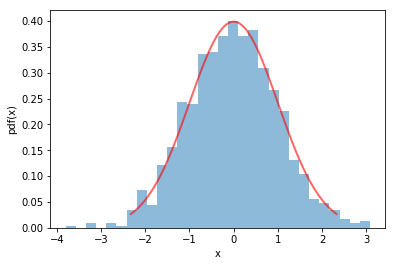

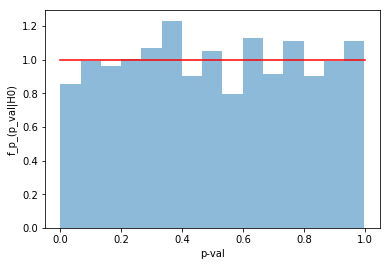

In [12]:
task_1(d_1, d_2, doc)
task_2(d_1, d_2, 0.05, doc)
task_3(d_1, d_2, 0.05, doc)
task_4(d_1, d_2, doc, 1, 406)

In [13]:
doc.save('lab1_nik.docx')